<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [13]:
#import itertools
import numpy as np #numpy is a module with many useful mathematical functions, pandas is based upon it and so is sklearn
import matplotlib.pyplot as plt #matplotlib is a graph plotting module
#from matplotlib.ticker import NullFormatter
import pandas as pd #pandas is a module purpose built for data analysis
#import matplotlib.ticker as ticker
from sklearn import preprocessing #sklearn is a machine learning module
%matplotlib inline 

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [15]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv #fetch data from storage

--2019-08-28 08:49:15--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-08-28 08:49:15 (13.0 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [16]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [17]:
df.shape

(346, 10)

### Convert to date time object 

In [18]:
#converting data to datetime objects allows a number of useful functions to be used on it
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [19]:
df['loan_status'].value_counts() #counts the number of values in column

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [20]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



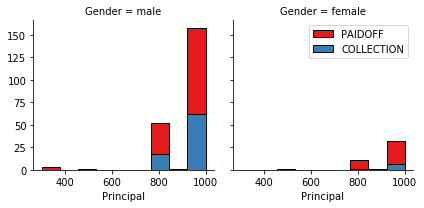

In [22]:
import seaborn as sns #seaborn is a graph plotting module based on matplotlib

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10) #create 10 bins from minimum Principal values to maximum Principal value
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2) #here various attributes of the graphs are decided: col = which column to plot, hue = with regards to which variable to plot the data, palette = colours to use, col_wrap = number of subplots per row in figure
g.map(plt.hist, 'Principal', bins=bins, ec="k") #finally plot data, ec = edge colour

g.axes[-1].legend() #show legend for y-axis
plt.show() #show plot

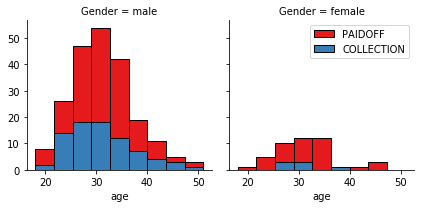

In [23]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

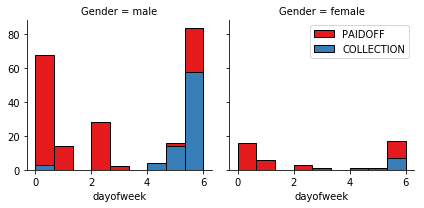

In [24]:
df['dayofweek'] = df['effective_date'].dt.dayofweek #create new column in data frame corresponding to day of week using datetime functions
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [25]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0) #create weekend column, where weekend defined as friday to sunday
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [26]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True) #find percentage of men and women who have an have not paid off loans

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [27]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True) #replace male and female with 0 or 1, inplace makes sure this is done in the Gender column to change the dataframe right there and then
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [28]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)
#df.groupby(['Principal'])['loan_status'].value_counts(normalize=True)
#df.groupby(['age'])['loan_status'].value_counts(normalize=True)
#df.groupby(['terms'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [29]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [30]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1) #get_dummies converts all string variables into numbers
Feature.drop(['Master or Above'], axis = 1, inplace=True) #masters and above has 50:50 chance of paying off loan, this will not be very useful for classification
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [31]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [32]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [33]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [34]:
from sklearn.model_selection import train_test_split #data splitting function

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4) #use 20% of the data for testing and finding best k, random state can usually be any number, but to reproduce results use the same number

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

jaccard_accuracy = [] #list for storing Jaccard index accuracy values at different k
f1_accuracy = [] #list for storing F1-score accuracy values at different k

for k in range(1, 15):
   neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train) #fit to training dataset
   y_hat = neigh.predict(X_test) #predict values from test dataset
   jaccard_accuracy.append(jaccard_similarity_score(y_test, y_hat))
   f1_accuracy.append(f1_score(y_test, y_hat, average = 'weighted'))

For k = 7, Jaccard index =  0.7857142857142857 , F1-score =  0.7766540244416351


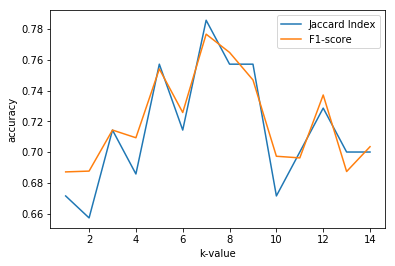

In [36]:
#plot k vs accuracy to see which k is best
k = np.linspace(1, len(jaccard_accuracy), len(jaccard_accuracy))
plt.plot(k, jaccard_accuracy)
plt.plot(k, f1_accuracy)
plt.xlabel('k-value')
plt.ylabel('accuracy')
plt.legend(('Jaccard Index', 'F1-score'))
#best k-value is therefore 7
print('For k = 7, Jaccard index = ', max(jaccard_accuracy), ', F1-score = ', max(f1_accuracy))

# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-pyhd1c1de3_3 conda-forge

The following packages will be UPDATED:

    ca-certificates: 2019.5.15-1        anaconda    --> 2019.6.16-hecc5488_0 conda-forge
    certifi:         2019.6.16-py36_1   an

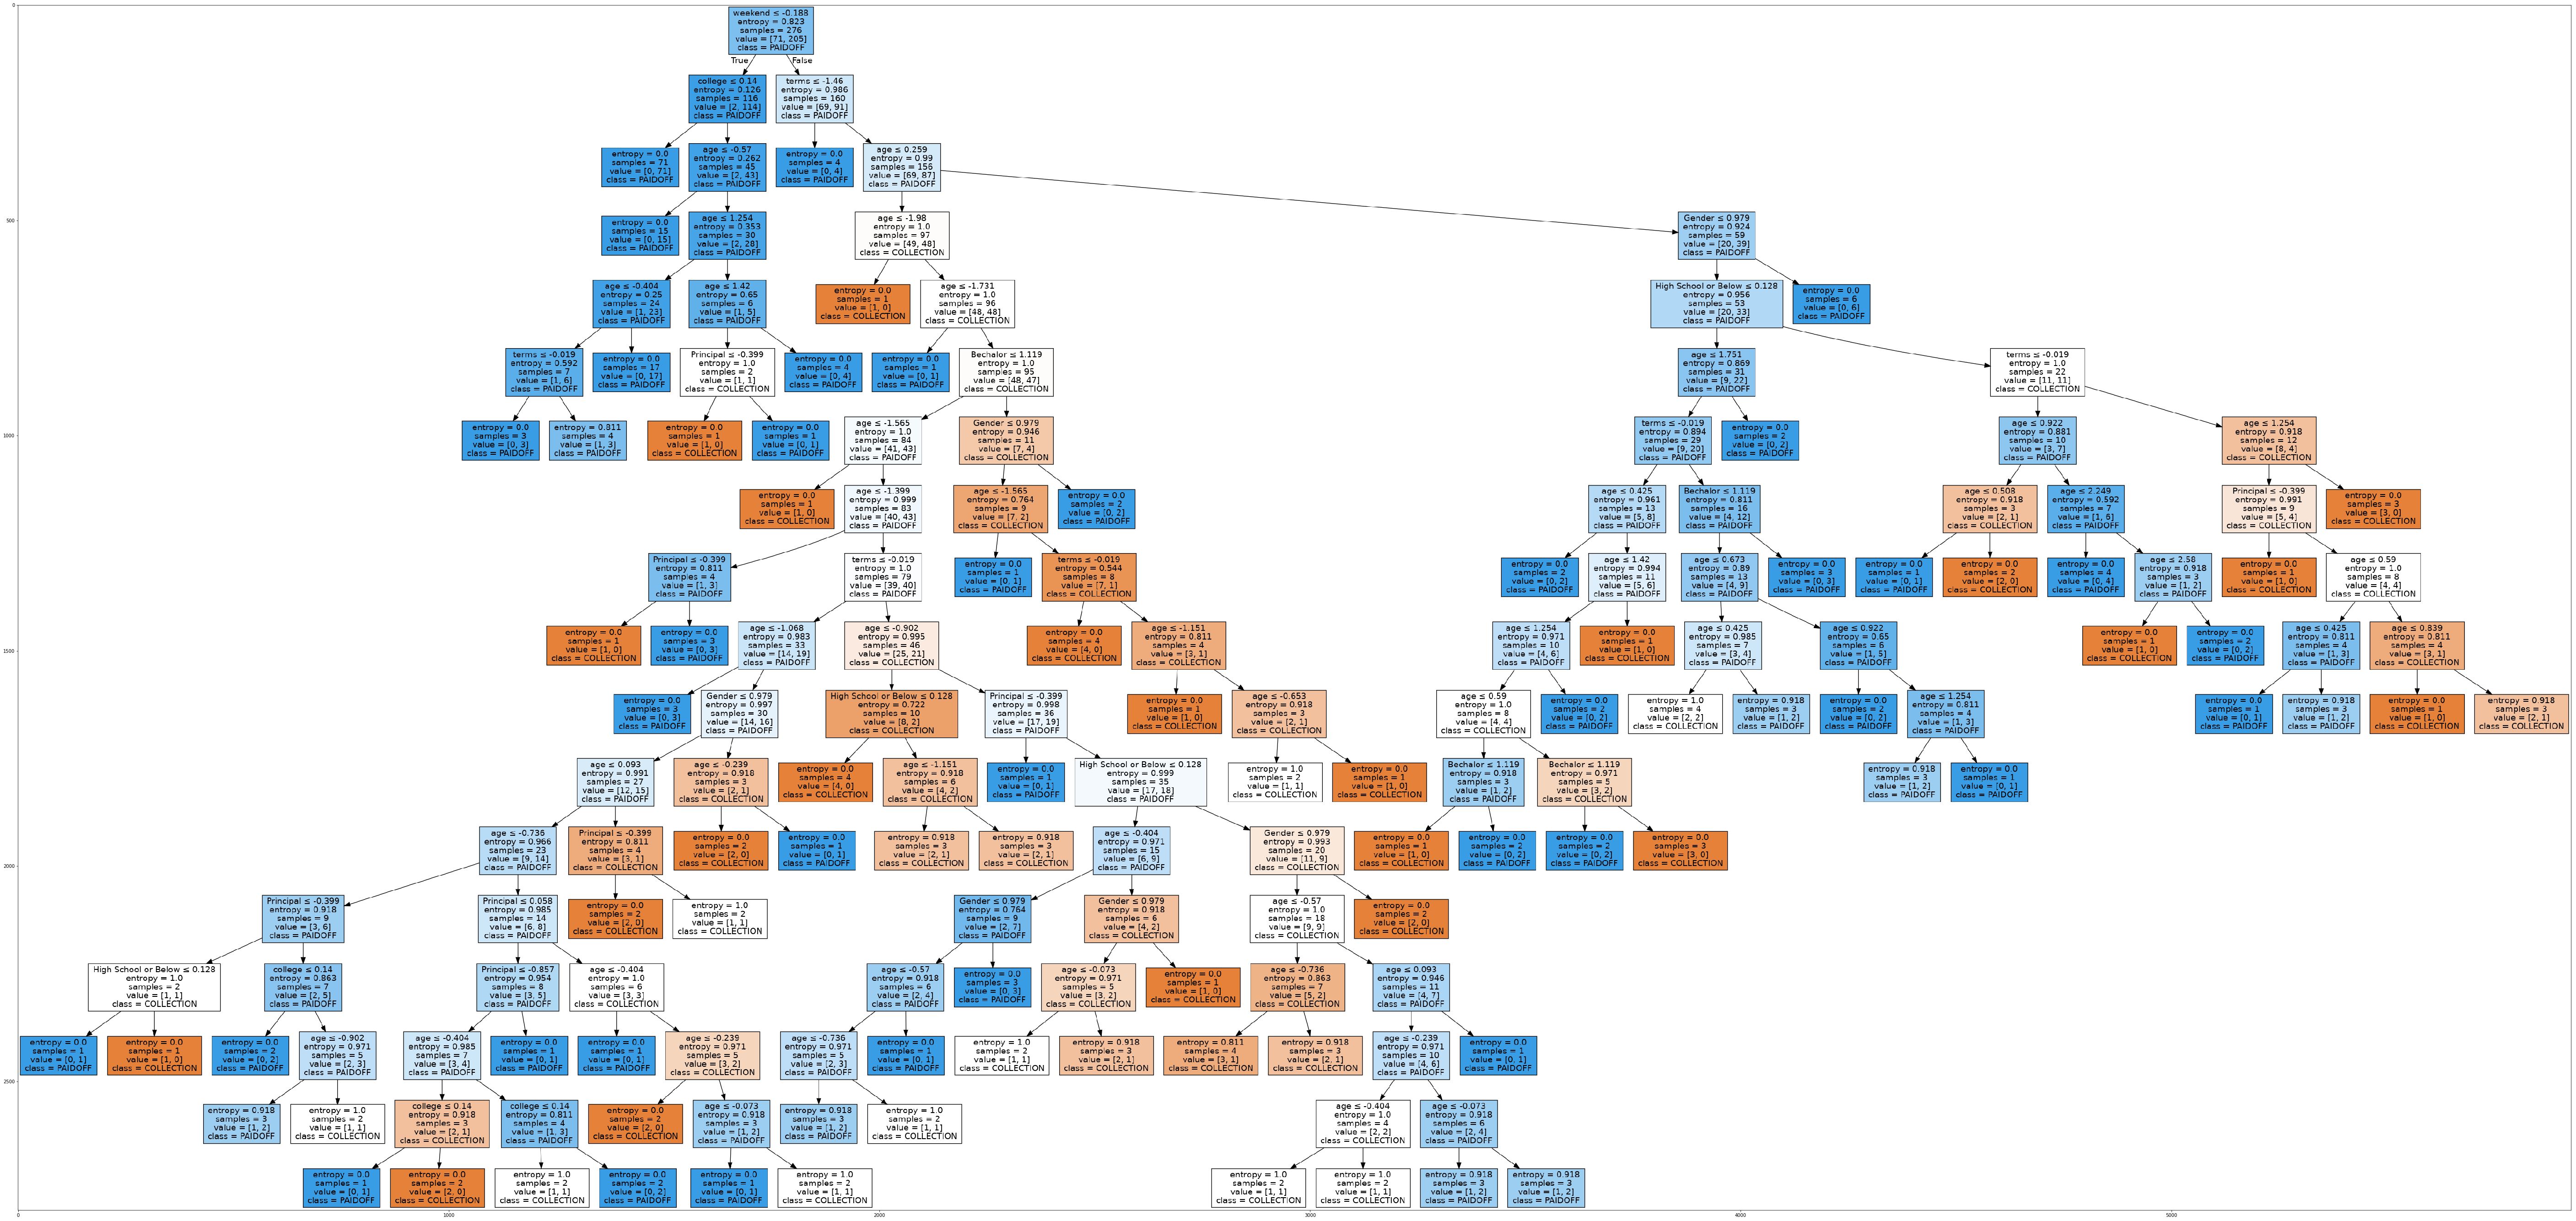

In [38]:
loanTree = DecisionTreeClassifier(criterion = 'entropy') #decide nodes based on entropy
loanTree.fit(X_train, y_train)

#code to plot decision tree, need to install below libraries for this to work. This is automated in newer versions of sklearn

!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

dot_data = StringIO()
filename = "loanTree.png"
featureNames = Feature.columns[0:8]
targetNames = df["loan_status"].unique().tolist()
out=tree.export_graphviz(loanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [39]:
predTree = loanTree.predict(X_test)
print('Jaccard index = ', jaccard_similarity_score(y_test, predTree), ', F1-score = ', f1_score(y_test, predTree, average = 'weighted'))

Jaccard index =  0.7 , F1-score =  0.7142857142857144


# Support Vector Machine

In [40]:
from sklearn import svm

In [41]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for i,j in enumerate(kernels): #iterate over different kernels to see which is best
   clf = svm.SVC(kernel = j, degree = 3) #degree only acts on 'poly' kernel
   clf.fit(X_train, y_train)
   y_hat = clf.predict(X_test)
   print('For the ', j, ' kernel, Jaccard index = ', jaccard_similarity_score(y_test, y_hat), ' and F1-score = ', f1_score(y_test, y_hat, average = 'weighted'))

For the  linear  kernel, Jaccard index =  0.7857142857142857  and F1-score =  0.6914285714285714
For the  poly  kernel, Jaccard index =  0.7714285714285715  and F1-score =  0.7064793130366899
For the  rbf  kernel, Jaccard index =  0.7428571428571429  and F1-score =  0.7275882012724117
For the  sigmoid  kernel, Jaccard index =  0.7428571428571429  and F1-score =  0.6892857142857144


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma w

In [ ]:
#by averaging over Jaccard and F1-score, poly kernel degree 3 is best

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
LR = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train, y_train) #note newton-cg solver gives exact same values
y_hat = LR.predict(X_test) #predict whether loan paid or defaulted
y_hat_prob = LR.predict_proba(X_test) #predict probabilities of loan payment or default

In [44]:
from sklearn.metrics import log_loss
print('Jaccard index = ', jaccard_similarity_score(y_test, y_hat), ', F1-score = ', f1_score(y_test, y_hat, average = 'weighted'), ', log-loss-score = ', log_loss(y_test, y_hat_prob))

Jaccard index =  0.6857142857142857 , F1-score =  0.6670522459996144 , log-loss-score =  0.5772287609479654


# Model Evaluation using Test set

In [45]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [46]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-08-28 09:04:36--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-08-28 09:04:36 (247 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [47]:
test_df = pd.read_csv('loan_test.csv')

In [48]:
#preprocess data as before

test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [50]:
feature_test = test_df[['Principal','terms','age','Gender','weekend']] #select features for evaluation
feature_test = pd.concat([feature_test,pd.get_dummies(test_df['education'])], axis=1) #replace categorial variables with numbers
feature_test.drop(['Master or Above'], axis = 1, inplace=True) #remove Master or above column
X2 = feature_test
y2 = test_df['loan_status'].values
X2 = preprocessing.StandardScaler().fit(X2).transform(X2) #normalize data

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


In [59]:
#KNN

neigh = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) #fit to training dataset. Use k = 7 as decided before
y_hat = neigh.predict(X2) #predict values from test dataset
print('For KNN, for k = 7, Jaccard index = ', jaccard_similarity_score(y2, y_hat), ', F1-score = ', f1_score(y2, y_hat, average = 'weighted'))

#Decision tree

predTree = loanTree.predict(X2)
print('For decision tree, Jaccard index = ', jaccard_similarity_score(y2, predTree), ', F1-score = ', f1_score(y2, predTree, average = 'weighted'))

#SVM

clf = svm.SVC(kernel = 'poly', degree = 3) #use 'poly' kernel degree 3 as decided above
clf.fit(X_train, y_train)
y_hat = clf.predict(X2)
print('For SVM, Jaccard index = ', jaccard_similarity_score(y2, y_hat), ' and F1-score = ', f1_score(y2, y_hat, average = 'weighted'))

#Logistic regression

y_hat = LR.predict(X2) #predict whether loan paid or defaulted
y_hat_prob = LR.predict_proba(X2) #predict probabilities of loan payment or default
print('For logistic regression, Jaccard index = ', jaccard_similarity_score(y2, y_hat), ', F1-score = ', f1_score(y2, y_hat, average = 'weighted'), ', log-loss-score = ', log_loss(y2, y_hat_prob))

#decision tree or SVM appear to be the most consistent methods across the different scores


For KNN, for k = 7, Jaccard index =  0.6666666666666666 , F1-score =  0.6328400281888654
For decision tree, Jaccard index =  0.7222222222222222 , F1-score =  0.7252534070517485
For SVM, Jaccard index =  0.7592592592592593  and F1-score =  0.6959228135698723
For logistic regression, Jaccard index =  0.7407407407407407 , F1-score =  0.6604267310789049 , log-loss-score =  0.5672153379912981


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>